In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw07.ipynb")

# Support vector machines

Support vector machines have supplanted forms of linear learning due to their emphasis upon separating classes and manipulating that separation carefully. Let's study some limits of the model. 

In [2]:
# Run this first to load all libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm 

In [3]:
# Here's a simple visualizer.   
def make_meshgrid(x, y, h=1):
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, model, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)

def visualize(model, df):
    X = df.loc[:, ['x', 'y']].values
    y = df.loc[:, 'label'].values
    X0, X1 = X[:, 0], X[:, 1]
    fig, ax = plt.subplots()
    # plot contour lines for predictions 
    xx, yy = make_meshgrid(np.array([0, 100]), np.array([0, 500]), 1)
    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=list(map(lambda x: 'b' if x<2 else 'r', y)))
    plt.show()

<!-- BEGIN QUESTION -->

*Question 1:* Consider the following data set:  

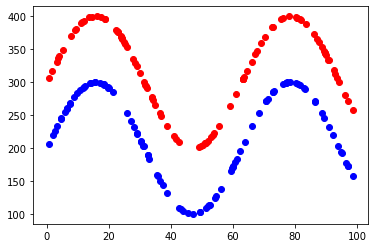

In [4]:
# Let's set up a very weird data set. 
def f1(x): 
    return np.sin(x/10) * 100 + 200
def f2(x): 
    return np.sin(x/10) * 100 + 300
np.random.seed(42)
x1 = np.random.uniform(0, 100, 100)
y1 = f1(x1)
x2 = np.random.uniform(0, 100, 100)
y2 = f2(x2)

df1 = pd.DataFrame({'x': x1, 'y': y1, 'label': 1})
df2 = pd.DataFrame({'x': x2, 'y': y2, 'label': 2})
df = pd.concat([df1, df2])

plt.plot(x1, y1, 'bo')
plt.plot(x2, y2, 'ro')                  

What decision function would optimally separate these populations? 

rbf(radial basis function) since we can tell that the data is not linearly seperable.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 2:* Fit an `svm.SVC` model `model1` to this data. You may use any predefined kernel. You are allowed 5 classification errors. Try to make as few as possible. 

In [5]:
# make model1 a fitted model
model1 = svm.SVC(kernel='rbf', gamma=0.025).fit(df.loc[:, ['x', 'y']].values, df['label'])

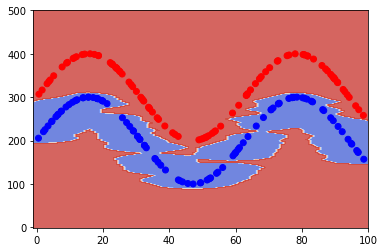

3 classification errors


In [6]:
visualize(model1, df)
import math
count = 0
for i in np.arange(0, 100):
    if model1.predict([[i, f1(i)]]) != [1]: 
        count += 1
for i in np.arange(0, 100):
    if model1.predict([[i, f2(i)]]) != [2]: 
        count += 1
print("{} classification errors".format(count))

In [7]:
grader.check("q2")

q2 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 3:* What are the obvious drawbacks to `model1`? 

overfitting. if you see the blue area overall, there are parts where there's a gap in between the blue data points where the model made it such that the area in between it is red. When in actual, the blue "wave" line should be all classified as blue.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 4:* Consider the following data set:  

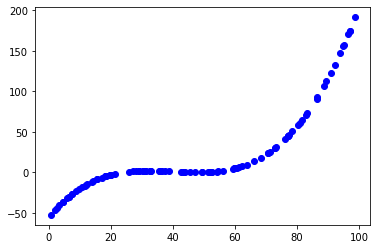

In [8]:
# Let's set up another very weird data set. 
def f3(x): 
    xtemp = (x - 50) / 10
    return xtemp*xtemp*xtemp + 3*xtemp*xtemp + xtemp
np.random.seed(42)
x3 = np.random.uniform(0, 100, 100)
y3 = f3(x3)

df3 = pd.DataFrame({'x': x3, 'y': y3})

plt.plot(x3, y3, 'bo')                  

What decision function would optimally identify this population of data points? 

linear. we can create a diagonal line above such that all the data points fall under that line.

<!-- END QUESTION -->



In [9]:
# let's create an appropriate visualizer for one-class SVM. 
def visualize_one(model, df):
    X = df.loc[:, ['x', 'y']].values
    X0, X1 = X[:, 0], X[:, 1]
    fig, ax = plt.subplots()
    # plot contour lines for predictions 
    xx, yy = make_meshgrid(X0, X1, 1)
    plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c='k')
    plt.show()

<!-- BEGIN QUESTION -->

*Question 5:* Fit a one-class SVC model `model2` to this data. You may use any predefined kernel.You are allowed up to 15 classification errors. 

In [10]:
# make model2 a fitted model
model2 = svm.OneClassSVM(kernel='linear', nu=0.01).fit(df3.loc[:, ['x', 'y']].values)

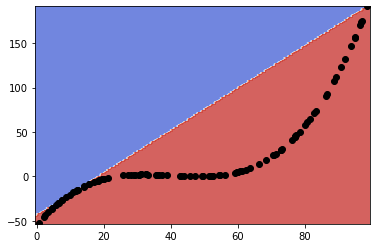

1 classification errors


In [11]:
visualize_one(model2, df3)
count = 0
for i in np.arange(0, 100):
    if model2.predict([[i, f3(i)]]) != [[1]]: 
        count += 1
print("{} classification errors".format(count))

In [12]:
grader.check("q5")

q5 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

*Question 6:* You might have noticed that I fixed the random seed -- and thus the example -- for these problems. What can happen randomly in problem 5 that I was trying to avoid? Demonstrate below. 

when random seed is fixed, running the np.random.uniform(0, 100, 100) will give us the same set of numbers no matter how many times it is called. if it is not fixed, then it'll give us different set everytime it is called. we don't want it to be different because if it is different everytime we call it then the classification will change since we are using the same one-class SVC model for different data sets. so if random seed is not fixed we'll have to change the model accordingly every time such that it's appropriate for the changed data.

first 3 graph generated is when random seed is not fixed, so the data sets for the 3 models are different,thus may result in different number of classification errors as they all use the same one-class SVM model. whereas for the last 3 model the random seed is fixed thus they have the same data sets resulting in same classification errors


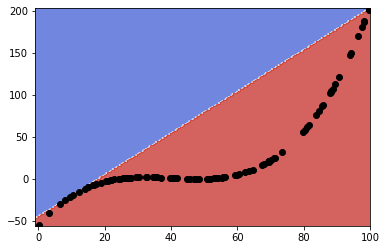

1 classification errors


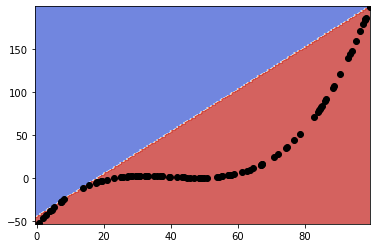

4 classification errors


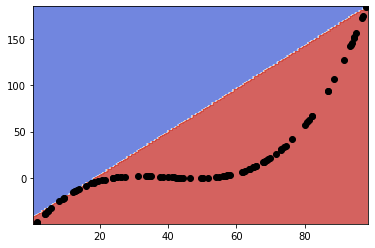

4 classification errors


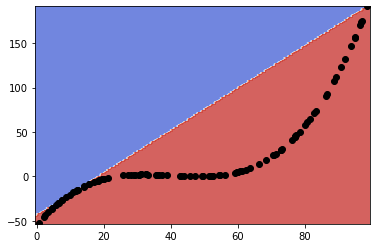

1 classification errors


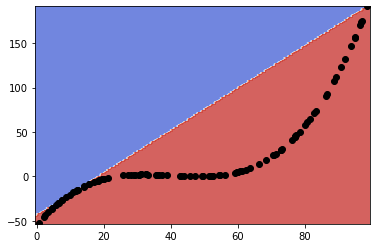

1 classification errors


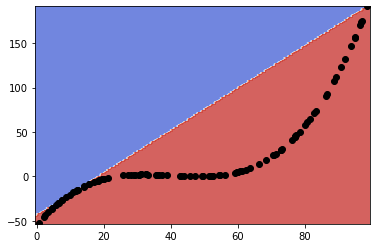

1 classification errors


In [13]:
# Demonstrate the problem here
def f4(x): 
    xtemp = (x - 50) / 10
    return xtemp*xtemp*xtemp + 3*xtemp*xtemp + xtemp

x_list = list()
y_list = list()
for i in range(3):
    x = np.random.uniform(0, 100, 100)
    y = f4(x)
    x_list.append(x)
    y_list.append(y)

x_fixed = list()
y_fixed = list()
for i in range(3):
    np.random.seed(42)
    x = np.random.uniform(0, 100, 100)
    y = f4(x)
    x_fixed.append(x)
    y_fixed.append(y)

print("first 3 graph generated is when random seed is not fixed, so the data sets for the 3 models are different,\
thus may result in different number of classification errors as they all use the same one-class SVM model. whereas \
for the last 3 model the random seed is fixed thus they have the same data sets resulting in same classification errors")
for i in range(3):
    dff = pd.DataFrame({'x': x_list[i], 'y': y_list[i]})
    model = svm.OneClassSVM(kernel='linear', nu=0.01).fit(dff.loc[:, ['x', 'y']].values)
    visualize_one(model, dff)
    count = 0
    for j in np.arange(0, 100):
        if model.predict([[j, f3(j)]]) != [[1]]: 
            count += 1
    print("{} classification errors".format(count))
    
for k in range(3):
    dff = pd.DataFrame({'x': x_fixed[k], 'y': y_fixed[k]})
    model = svm.OneClassSVM(kernel='linear', nu=0.01).fit(dff.loc[:, ['x', 'y']].values)
    visualize_one(model, dff)
    count = 0
    for i in np.arange(0, 100):
        if model.predict([[i, f3(i)]]) != [[1]]: 
            count += 1
    print("{} classification errors".format(count))

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [14]:
grader.check_all()

q2 results: All test cases passed!

q5 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

You are not done until you upload the exported zipfile to GradeScope.

In [15]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)